In [13]:
import pandas as    pd
import seaborn as   sns
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('./results.csv')
for i in [2,4,8,12,16,20,24,28,32,36,40,60,80]:
    df[f"S{i}"] = df['T1'] / df[f"T{i}"]
df

,Size,T1,T2,T4,T8,T12,T16,T20,T24,T28,...,S12,S16,S20,S24,S28,S32,S36,S40,S60,S80
0,20000,1.965328,1.043503,0.525826,0.264991,1.966740,0.145672,0.142709,0.164501,0.146049,...,0.999282,13.491460,13.771577,11.947210,13.456634,23.240442,29.177784,29.127190,26.954795,34.644150
1,40000,7.896008,4.179173,2.129919,1.072375,8.112386,0.621031,0.728705,0.618775,0.498218,...,0.973327,12.714354,10.835671,12.760709,15.848500,23.554142,21.821038,25.984993,27.489714,35.448643


In [22]:
df_20000 = pd.DataFrame(columns=["S", "T num"])
df_40000 = pd.DataFrame(columns=["S", "T num"])
for i in [2,4,8,12,16,20,24,28,32,36,40,60,80]:
    df_20000.loc[len(df_20000)] = [df.loc[0, f"S{i}"], int(i)]
    df_40000.loc[len(df_40000)] = [df.loc[1, f"S{i}"], int(i)]
df_20000["T num"] = df_20000["T num"].astype(int)
df_40000["T num"] = df_20000["T num"].astype(int)
df_40000

,S,T num
0,1.889371,2
1,3.707187,4
2,7.363103,8
3,0.973327,12
4,12.714354,16
5,10.835671,20
6,12.760709,24
7,15.848500,28
8,23.554142,32
9,21.821038,36


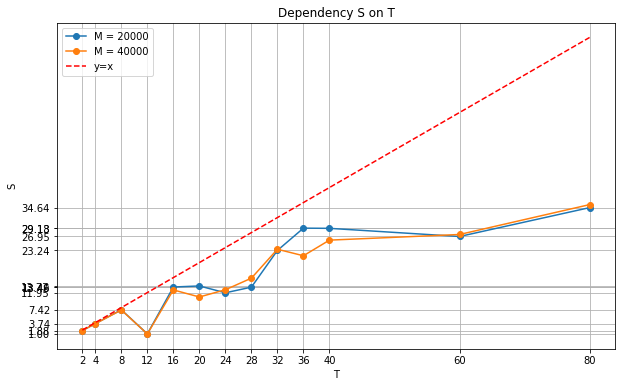

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(df_20000["T num"], df_20000["S"], marker='o', label='M = 20000')
plt.plot(df_40000["T num"], df_40000["S"], marker='o', label='M = 40000')

# График y=x
plt.plot(df_20000["T num"], df_20000["T num"], linestyle='--', color='red', label='y=x')

plt.xlabel('T')
plt.ylabel('S')
plt.title('Dependency S on T')
plt.legend()
plt.xticks(df_20000["T num"])
plt.yticks(df_20000["S"])
plt.grid(True)
plt.savefig("plot.png")
plt.show()